# Bank Customer Churn Prediction
                                        - Harsh Kondkar

**This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.**

Link to the Dataset:
https://www.kaggle.com/shrutimechlearn/churn-modelling

### Details of Features present in the dataset


- **CustomerId**: Unique Ids for bank customer identification
- **Surname**: Customer's last name
- **CreditScore**: Credit score of the customer (measure of how potential lenders see him/her)
- **Geography**: The country from which the customer belongs
- **Gender**: Male or Female
- **Age**: Age of the customer
- **Tenure**: Number of years for which the customer has been with the bank
- **Balance**: Bank balance of the customer
- **NumOfProducts**: Number of bank products the customer is utilising
- **HasCrCard**: Binary Flag for whether the customer holds a credit card with the bank or not
- **IsActiveMember**: Binary Flag for whether the customer is an active member with the bank or not
- **EstimatedSalary**: Estimated salary of the customer in Dollars
- **Exited**: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',15)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.drop('RowNumber', axis = 1, inplace = True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**We will not be needing the *CustomerId* for our analysis or model building therefore it will be dropped**

In [3]:
df.drop('CustomerId', axis = 1, inplace = True)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Let us look at which datatypes are we dealing with**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


- **So we have Numeric as well as Categorical data with us.**
- **Fortunately, we do not have any missing values in our dataset so we won't have to worry about dealing with them**

- **Let's checkout our target variable: *Exited*:**

In [5]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
len(df[df['Exited'] == 0])/len(df[df['Exited'] == 1])

3.9091801669121256

**The ratio of number of records available per class is almost 4:1**

**We do  seem to have a case of imbalanced dataset here which we will deal with later**

**Separating the features into Numeric and Categorical for easy analysis**

In [7]:
num_cols = [feature for feature in df.columns
           if df[feature].dtype != 'O']
cat_cols = [feature for feature in df.columns
           if df[feature].dtype == 'O']

**Splitting the numeric features into continuous and discrete**

In [8]:
cont_cols = [feature for feature in num_cols
            if df[feature].nunique()>25]
disc_cols = [feature for feature in num_cols
            if feature not in cont_cols]

## Exploratory Data Analysis

### Visual Analysis

#### Continuous Features

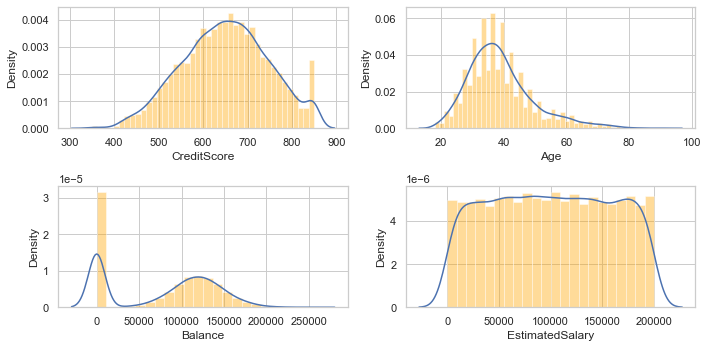

In [9]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,5))
pltno = 1
for col in cont_cols:
    if pltno < 5:
        ax = plt.subplot(2,2,pltno)
        sns.distplot(df[col], hist_kws = {'color':'orange'}, kde_kws = {'color': 'b'})
        plt.xlabel(col)
    pltno += 1
plt.tight_layout()
plt.show()

In [10]:
disc_cols.remove('Exited')

#### Discrete Features

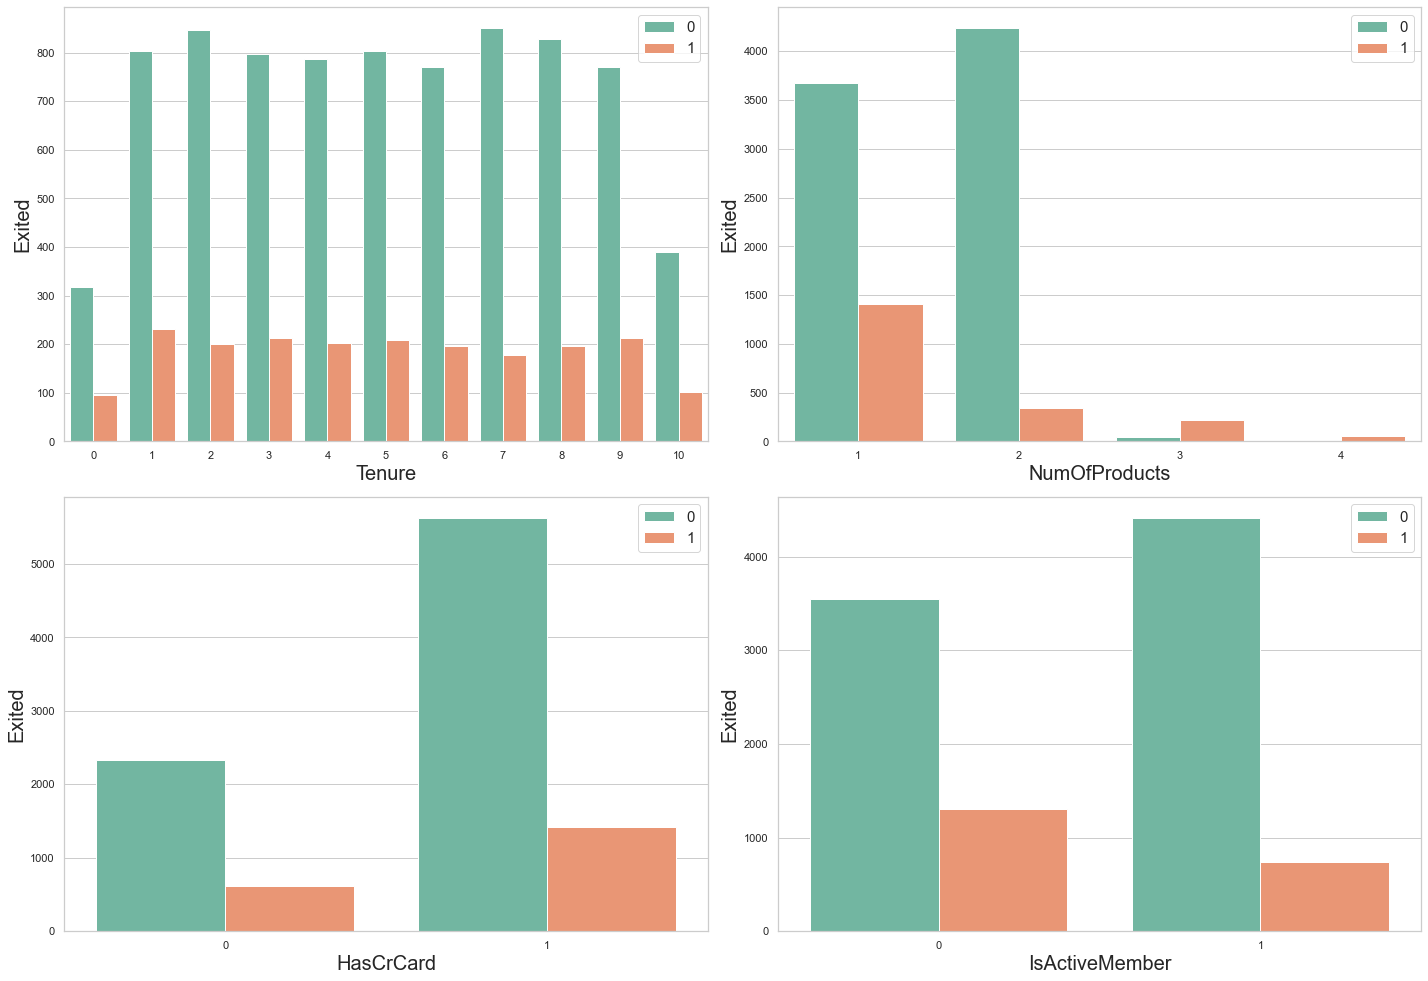

In [11]:
plt.figure(figsize = (20,20))
pltno = 1
for col in disc_cols:
    if pltno < 6:
        ax = plt.subplot(3,2,pltno)
        sns.countplot(df[col], hue = df['Exited'], palette = 'Set2')
        plt.xlabel(col,fontdict={'fontsize':20})
        plt.ylabel('Exited', fontdict = {'fontsize':20})
        plt.legend(fontsize= 15)
    pltno += 1
plt.tight_layout()
plt.show()

#### Categorical Features

In [12]:
cat_cols2 = ['Gender', 'Geography']

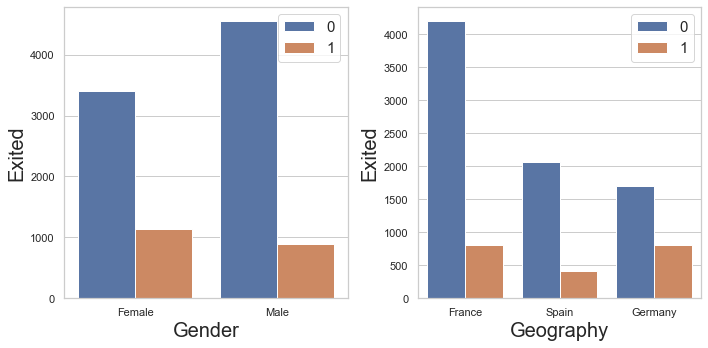

In [13]:
plt.figure(figsize = (10,5))
pltno = 1
for col in cat_cols2:
    if pltno < 3:
        plt.subplot(1,2,pltno)
        sns.countplot(df[col], hue = df['Exited'])
        plt.xlabel(col,fontdict={'fontsize':20})
        plt.ylabel('Exited', fontdict = {'fontsize':20})
        plt.legend(fontsize= 15)
    pltno+=1
plt.tight_layout()
plt.show()

In [14]:
print('The percentage of French Men who exited the bank: {} %'.format \
      (round(df[(df['Geography'] == 'France') & (df['Gender'] == 'Male')]['Exited'].value_counts(normalize = True)[1]*100,2)))
print('The percentage of French Women who exited the bank: {} %'.format \
      (round(df[(df['Geography'] == 'France') & (df['Gender'] == 'Female')]['Exited'].value_counts(normalize = True)[1]*100,2)))

The percentage of French Men who exited the bank: 12.71 %
The percentage of French Women who exited the bank: 20.34 %


In [15]:
print('The percentage of Spanish Men who exited the bank: {} %'.format \
      (round(df[(df['Geography'] == 'Spain') & (df['Gender'] == 'Male')]['Exited'].value_counts(normalize = True)[1]*100,2)))
print('The percentage of Spanish Women who exited the bank: {} %'.format \
      (round(df[(df['Geography'] == 'Spain') & (df['Gender'] == 'Female')]['Exited'].value_counts(normalize = True)[1]*100,2)))

The percentage of Spanish Men who exited the bank: 13.11 %
The percentage of Spanish Women who exited the bank: 21.21 %


In [16]:
print('The percentage of German Men who exited the bank: {} %'.format \
      (round(df[(df['Geography'] == 'Germany') & (df['Gender'] == 'Male')]['Exited'].value_counts(normalize = True)[1]*100,2)))
print('The percentage of German Women who exited the bank: {} %'.format \
      (round(df[(df['Geography'] == 'Germany') & (df['Gender'] == 'Female')]['Exited'].value_counts(normalize = True)[1]*100,2)))

The percentage of German Men who exited the bank: 27.81 %
The percentage of German Women who exited the bank: 37.55 %


In [17]:
df1 = df.copy()
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**We won't be needing the *Surname* feature so we will simply drop that column**

In [18]:
df1.drop('Surname', axis = 1, inplace = True)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Feature Engineering

**Separating the X and y labels**

In [19]:
X = df1.drop('Exited', axis = 1)
y = df1['Exited']

#### Encoding the Categorical columns

- Gender

In [20]:
X['Gender'].replace({'Male':1,
                    'Female':0}, inplace = True)

- Geography (One Hot Encoding)

In [21]:
X = pd.get_dummies(X, columns = ['Geography'] , drop_first = True)

In [22]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


#### Scaling the Continuous Features

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(np.array(X[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]))

In [24]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,2,0.000000,1,1,1,0.506735,0,0
1,0.516,0,0.310811,1,0.334031,1,0,1,0.562709,0,1
2,0.304,0,0.324324,8,0.636357,3,1,0,0.569654,0,0
3,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0,0
4,1.000,0,0.337838,2,0.500246,1,1,1,0.395400,0,1


### Splitting the Data into Train and Test

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
y_train.value_counts()

0    5584
1    1416
Name: Exited, dtype: int64

**Highly imbalance Dataset so we will upsample the minority class using Synthetic Minority Oversampling Technique(SMOTE)**

In [27]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install delayed

Note: you may need to restart the kernel to use updated packages.


**Importing SMOTE from Imbalance-Learn module**

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority', random_state = 0)

In [30]:
X_sm, y_sm = smote.fit_resample(X_train,y_train)

In [31]:
y_sm.value_counts()

1    5584
0    5584
Name: Exited, dtype: int64

**Perfectly Balanced, as all things should be**

**(X_sm, y_sm) will be our training data and (X_test, y_test) will be used to check the model performance**

## Model Building

## ML

- Logistic Regression 
- Decision Tree  
- Random Forest 
- AdaBoost
- Gradient Boosting
- XgBoost

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [35]:
clflog = GridSearchCV(LogisticRegression(max_iter = 5000, random_state=0), param_grid = {
            'C': np.arange(0.1, 10, 0.5),
            'solver': ['liblinear', 'saga']
        }, cv = 5)
clflog.fit(X_sm,y_sm)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, random_state=0),
             param_grid={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6]),
                         'solver': ['liblinear', 'saga']})

In [36]:
clflog.best_params_

{'C': 8.1, 'solver': 'saga'}

In [37]:
log = LogisticRegression(max_iter = 5000, random_state=0, solver = 'saga', C = 8.1)
log.fit(X_sm,y_sm)
logregtest = cross_val_score(log, X_test, y_test, cv = 5).mean()

In [80]:
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      2379
           1       0.39      0.70      0.50       621

    accuracy                           0.71      3000
   macro avg       0.64      0.70      0.65      3000
weighted avg       0.79      0.71      0.73      3000



Text(0.5, 1.0, 'Logistic Regression Model')

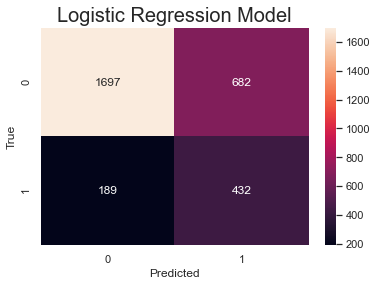

In [103]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot = True, fmt = '0.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Model', fontdict = {'fontsize':20})

### Decision Tree

In [38]:
clfdt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = {
            'criterion': ['gini', 'entropy']
        }, cv = 5)
clfdt.fit(X_sm,y_sm)
clfdt.best_params_

{'criterion': 'entropy'}

In [39]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dt.fit(X_sm,y_sm)
dttest = cross_val_score(dt, X_test, y_test, cv = 5).mean()

In [81]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2379
           1       0.46      0.56      0.51       621

    accuracy                           0.77      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.79      0.77      0.78      3000



Text(0.5, 1.0, 'Decision Tree Model')

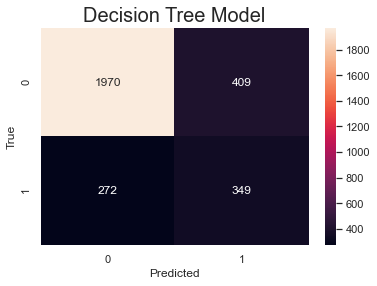

In [102]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, fmt = '0.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Model', fontdict = {'fontsize':20})

### Random Forest

In [40]:
clfrf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid = {
            'criterion': ['gini', 'entropy'],
            'n_estimators': np.arange(50,150,10)
        }, cv = 5)
clfrf.fit(X_sm,y_sm)
clfrf.best_params_

{'criterion': 'gini', 'n_estimators': 70}

In [41]:
rf = RandomForestClassifier(criterion = 'gini', n_estimators = 70, random_state=0)
rf.fit(X_sm,y_sm)
rftest = cross_val_score(rf, X_test, y_test, cv = 5).mean()

In [100]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2379
           1       0.59      0.66      0.62       621

    accuracy                           0.83      3000
   macro avg       0.75      0.77      0.76      3000
weighted avg       0.84      0.83      0.84      3000



Text(0.5, 1.0, 'Random Forest Model')

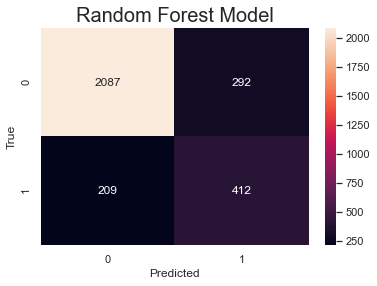

In [101]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = '0.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Model', fontdict = {'fontsize':20})

### AdaBoost

In [42]:
clfada = GridSearchCV(AdaBoostClassifier(random_state=0), param_grid = {
            'n_estimators' : np.arange(50,160,10),
            'learning_rate': np.arange(0.1, 1.1, 0.2)
        }, cv = 5)
clfada.fit(X_sm,y_sm)
clfada.best_params_

{'learning_rate': 0.9000000000000001, 'n_estimators': 150}

In [43]:
ada = AdaBoostClassifier(learning_rate = 0.9, n_estimators = 150, random_state=0)
ada.fit(X_sm,y_sm)
adatest = cross_val_score(ada, X_test, y_test, cv = 5).mean()

In [82]:
y_pred_ada = ada.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2379
           1       0.50      0.74      0.60       621

    accuracy                           0.80      3000
   macro avg       0.71      0.77      0.73      3000
weighted avg       0.84      0.80      0.81      3000



Text(0.5, 1.0, 'AdaBoost Model')

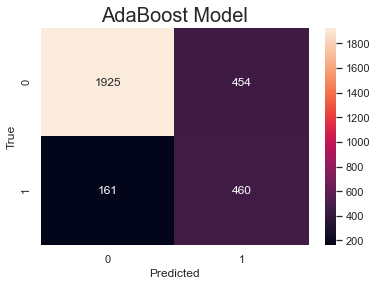

In [99]:
cm = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm, annot = True, fmt = '0.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('AdaBoost Model', fontdict = {'fontsize':20})

### Gradient Boosting

In [44]:
clfgb = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid = {
            'n_estimators' : np.arange(50,160,10),
            'learning_rate': np.arange(0.1, 1.1, 0.2)
        }, cv = 5)
clfgb.fit(X_sm,y_sm)
clfgb.best_params_

{'learning_rate': 0.7000000000000001, 'n_estimators': 80}

In [45]:
gb = GradientBoostingClassifier(learning_rate = 0.7, n_estimators = 80, random_state=0)
gb.fit(X_sm,y_sm)
gbtest = cross_val_score(gb, X_test, y_test, cv = 5).mean()

In [83]:
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2379
           1       0.63      0.60      0.61       621

    accuracy                           0.84      3000
   macro avg       0.76      0.75      0.76      3000
weighted avg       0.84      0.84      0.84      3000



Text(0.5, 1.0, 'Gradient Boosting Model')

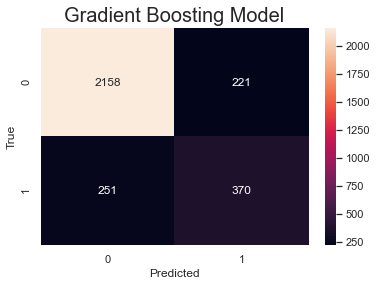

In [98]:
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot = True, fmt = '0.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gradient Boosting Model', fontdict = {'fontsize':20})

### XgBoost

In [46]:
clfxgb = GridSearchCV(XGBClassifier(random_state=0), param_grid = {
            'n_estimators' : np.arange(50,160,10),
            'learning_rate': np.arange(0.1, 1.1, 0.2)
        }, cv = 5)
clfxgb.fit(X_sm,y_sm)
clfxgb.best_params_

[10:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:53:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:53:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'learning_rate': 0.30000000000000004, 'n_estimators': 140}

In [47]:
xgb = XGBClassifier(learning_rate = 0.3, n_estimators = 140, random_state=0)
xgb.fit(X_sm,y_sm)
xgbtest = cross_val_score(xgb, X_test, y_test, cv = 5).mean()

[10:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [84]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2379
           1       0.66      0.59      0.62       621

    accuracy                           0.85      3000
   macro avg       0.78      0.75      0.76      3000
weighted avg       0.85      0.85      0.85      3000



Text(0.5, 1.0, 'XgBoost Model')

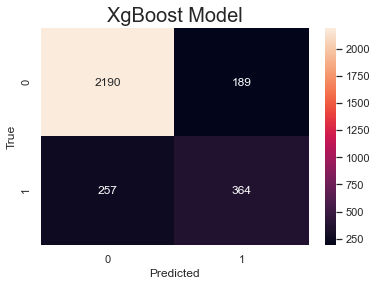

In [97]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot = True, fmt = '0.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XgBoost Model', fontdict = {'fontsize':20})

In [48]:
results = [logregtest,
              dttest,
               rftest,
              adatest,
               gbtest,
               xgbtest]

In [49]:
df_results = pd.DataFrame(data = results,  \
                          index = ['Logistic Regression', 'Decision Tree','Random Forest', 'AdaBoost','Gradient Boosting','XGBoost' ])
df_results.rename(columns = {
    0: 'Score'
}, inplace = True)

In [50]:
df_results.sort_values(by = 'Score',ascending = False)

,Score
AdaBoost,0.863333
Random Forest,0.863000
XGBoost,0.850000
Gradient Boosting,0.835667
Logistic Regression,0.812000
Decision Tree,0.786667


## DL

In [52]:
X_sm.shape

(11168, 11)

In [51]:
from tensorflow import keras

In [69]:
model = keras.Sequential([
    keras.layers.Dense(11, input_shape = (11,), activation = 'relu'),
    keras.layers.Dense(8, activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [70]:
model.fit(X_sm, y_sm, epochs = 100)

Epoch 1/100
349/349 [==============================] - 1s 3ms/step - loss: 0.6750 - accuracy: 0.5806
Epoch 2/100
349/349 [==============================] - 1s 3ms/step - loss: 0.6164 - accuracy: 0.6626
Epoch 3/100
349/349 [==============================] - 1s 3ms/step - loss: 0.5811 - accuracy: 0.6938
Epoch 4/100
349/349 [==============================] - 1s 3ms/step - loss: 0.5622 - accuracy: 0.7093
Epoch 5/100
349/349 [==============================] - 1s 3ms/step - loss: 0.5542 - accuracy: 0.7177
Epoch 6/100
349/349 [==============================] - 1s 3ms/step - loss: 0.5478 - accuracy: 0.7273
Epoch 7/100
349/349 [==============================] - 1s 3ms/step - loss: 0.5424 - accuracy: 0.7281
Epoch 8/100
349/349 [==============================] - 1s 3ms/step - loss: 0.5355 - accuracy: 0.7349
Epoch 9/100
349/349 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.7398
Epoch 10/100
349/349 [==============================] - 1s 3ms/step - loss: 0.5216 - accura

349/349 [==============================] - 1s 3ms/step - loss: 0.4356 - accuracy: 0.7931
Epoch 82/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.7967
Epoch 83/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4324 - accuracy: 0.7956
Epoch 84/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4334 - accuracy: 0.7970
Epoch 85/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.7992
Epoch 86/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.7965
Epoch 87/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4325 - accuracy: 0.7974
Epoch 88/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4330 - accuracy: 0.7981
Epoch 89/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4329 - accuracy: 0.7968
Epoch 90/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4323 - accuracy: 

In [104]:
loss, score = model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.7960


In [74]:
yp = model.predict(X_test)

In [75]:
y_pred = []
for ele in yp:
    if ele >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [76]:
y_pred[:5]

[1, 1, 0, 0, 0]

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2379
           1       0.50      0.74      0.60       621

    accuracy                           0.80      3000
   macro avg       0.71      0.77      0.73      3000
weighted avg       0.84      0.80      0.81      3000



Text(0.5, 1.0, 'Deep Learning ANN Model')

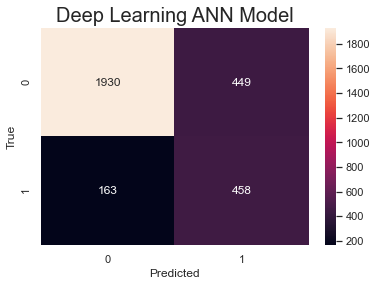

In [96]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '0.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Deep Learning ANN Model', fontdict = {'fontsize':20})

In [ ]:
df_results.loc['DL-ANN'] = score

In [110]:
df_results.sort_values(by = 'Score', ascending = False)

,Score
AdaBoost,0.863333
Random Forest,0.863000
XGBoost,0.850000
Gradient Boosting,0.835667
Logistic Regression,0.812000
DL-ANN,0.796000
Decision Tree,0.786667


**But in such case only the Accuracy is not sufficient, you have to look at the classification report too for checking how the model is performing with respect to individual labels. We need to find those who will churn so we will choose that model which will give us maximum Recall score**